In [3]:
# basic imports 

import tensorflow as tf 

# helpers 

import numpy as np 
import matplotlib.pyplot as plt 

print(tf.__version__)

2.20.0


In [4]:
# import dataset 
fashion_minst = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_minst.load_data()

In [5]:
# classes names 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
# format of data 
train_images.shape


(60000, 28, 28)

In [7]:
# size of the training set 
len(train_labels)

60000

In [8]:
#label are integers between 0..9
train_labels

array([9, 0, 0, ..., 3, 0, 5], shape=(60000,), dtype=uint8)

In [9]:
# test images shape 
test_images.shape

(10000, 28, 28)

In [10]:
# test size 
len(test_labels)

10000

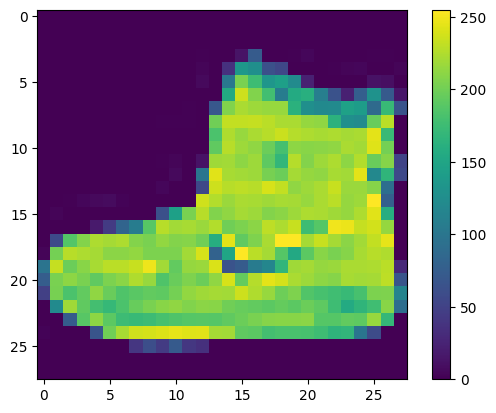

In [11]:
#preprocess the data 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [12]:
#normalize the data to scale of 1  
train_images = train_images / 255.0
test_images  = test_images / 255.0

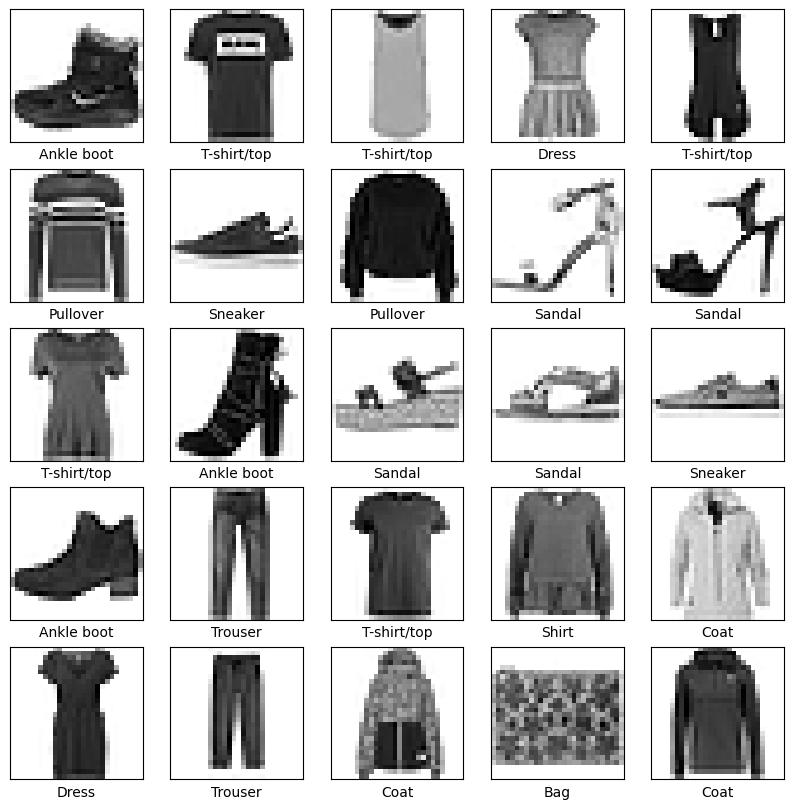

In [13]:
# check if the data is in the  correct format 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [14]:
# build the model 

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(10)
])

e:\programs\py\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#compile the model  (define the optimizer and loss function and the metrics)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
#train the model 
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8239 - loss: 0.4986
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8646 - loss: 0.3751
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8782 - loss: 0.3366
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8848 - loss: 0.3128
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8917 - loss: 0.2951
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8969 - loss: 0.2802
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9001 - loss: 0.2694
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9032 - loss: 0.2591
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9072 - loss: 0.2487
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9103 - loss: 0.2399
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9130 - loss: 0.2330
Epoch 12/15
1875/1875 ━━━━━━━━

In [17]:
#evaluate accuracy 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.8870 - loss: 0.3530


In [18]:
#make predictions 

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step


In [19]:
predictions[0]

array([3.8597271e-08, 3.3782637e-13, 2.2252877e-11, 1.8463243e-11,
       5.2364428e-12, 3.7068930e-06, 2.1807271e-08, 1.3895521e-02,
       6.5475891e-10, 9.8610061e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

np.int64(9)

In [21]:
test_labels[0]

np.uint8(9)

In [29]:

#define functions to graph the full set of 10 class predictions
def plot_images(i, predictions_array, true_label, img): 
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label): 
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot  = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

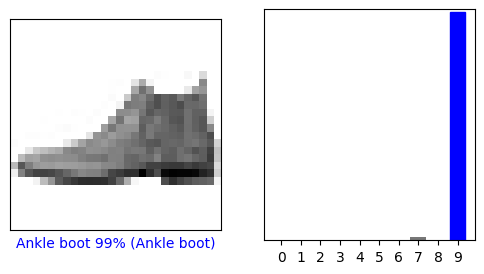

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


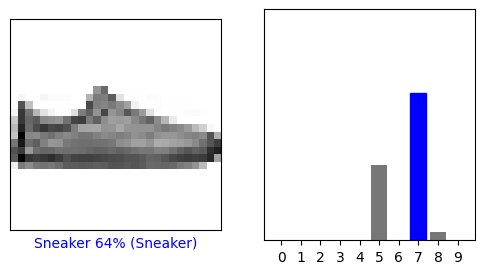

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


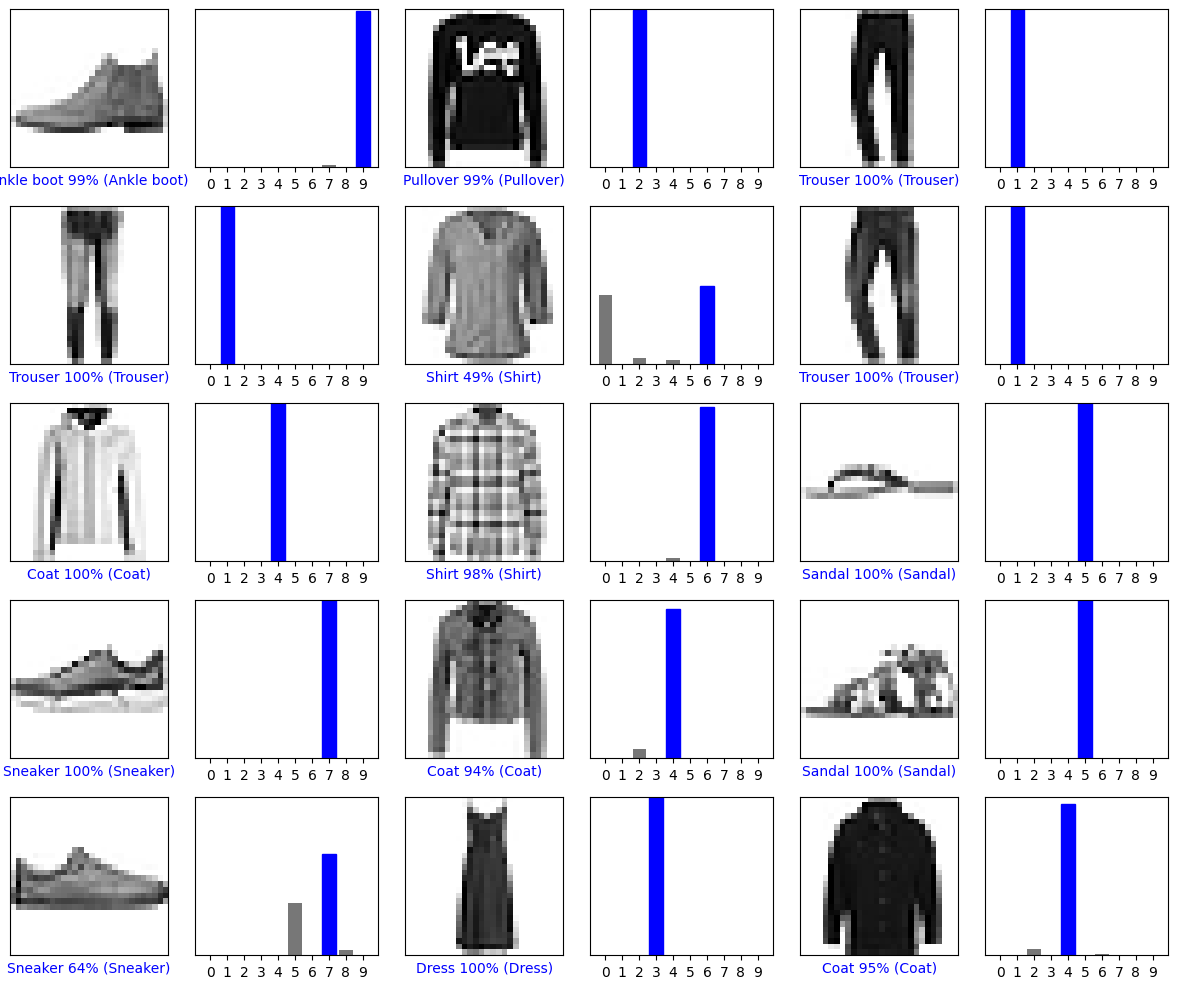

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_images(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [33]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [34]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [35]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[3.1198238e-03 1.5227020e-16 9.9413526e-01 3.0554562e-14 2.7164489e-03
  4.1453946e-10 2.8450741e-05 1.5240632e-14 1.1829971e-11 1.4305313e-19]]


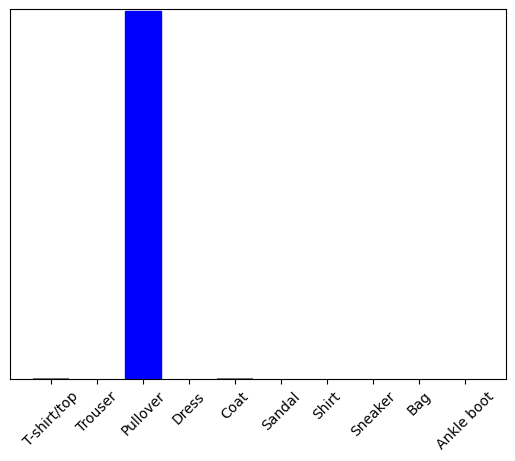

In [36]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [37]:
np.argmax(predictions_single[0])


np.int64(2)